# Project 1 : Analyse de l'ensemble de données Portant sur les rendez-vous des patients à l'hôpital.  

## Plan d'analyse
1. Introduction
2. Préparation des données
3. Analyse Exploratoire des données
4. Conclusion

## Introduction
L'ensemble de données choix est :[No-Show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) disponible sur [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).  
Il arrive qu’un patient ayant reçu des instructions pour un rendez-vous avec le médecin ne se point pas. Plusieurs cas ont également été recensé au brésil. L’ensemble de données récoltés présente plusieurs 13 variables explicatives et 1 variable à expliquer. Les variables explicatives sont entre autres : 'Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, AppointmentDay_month, AppointmentDay_day' et la variable à expliquer est : No_show. La question que l’on se pose lesquelles de ces variables sont susceptible de prédire si un patient sera présent à son rendez-vous avec le médecin. Pour répondre à cette question, nous nous posons plusieurs autres questions figurer dans les lignes qui suivent.

## Questions

1) Quelles catégories d’âge respecte le plus les rendez-vous avec le médecin.   
2) Faut-il nécessairement rappeler un patient de son rendez-vous par SMS ?  
3) L’aide financière pour la santé est-il explique-t-elle la présence d’un patient à son rendez-vous ?  
4) Le jour du rendez-vous est-elle favorable aux employés.   
5) Les patients Hypertendu ou Diabétique respectent leur rendez-vous. 
6) Qui des hommes ou des femmes honores les rendez-vous à l'hôpital?  


In [12]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
"""
Cette fonction est utilisée pour la visualisation de l'analyse bivariée
@param data : les données de la variable à expliquer et une variable explicatives
        title : le titre du graphe
        barh : afficher le diagramme en bar de manière Horizontal si True et Vertical sinon
return None
"""
def barhplot(data, title="", barh=False):
    plt.figure(figsize=(10,4))    
    plt.title(title)  

    if barh:
        plt.xlabel("Effectif")
        data.value_counts().plot(kind="barh")
    else:
        plt.ylabel("Effectif")
        data.value_counts().plot(kind="bar")
    pass

In [14]:
"""
 Fonction de visualisation des variables avec un pie chart
 @param colonne : designe la variable à visualiser.
 return None.
"""

def pieplot(colonne):
    plt.figure(figsize=(10, 6), facecolor= "white")
    colonne.value_counts().plot(kind="pie")
    pass

In [15]:
"""
 Fonction de visualisation des variables avec un diagramme en bar
 @param colonne : designe la variable à visualiser.
 return None.
"""
def barplot(colonne, label={}, title=""):
    plt.figure(figsize=(12,6))
    colonne.value_counts().plot(kind="bar")
    plt.xlabel(label["x"])
    plt.ylabel(label["y"])
    plt.title(title)  
    pass

In [16]:
# Chargement de l'ensemble de données
df = pd.read_csv("appointments_data.csv")

In [17]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [18]:
# Dimension de nôtre dataset
df.shape

(110527, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Visualisation des différentes variables manquantes avec heatmap

<AxesSubplot:>

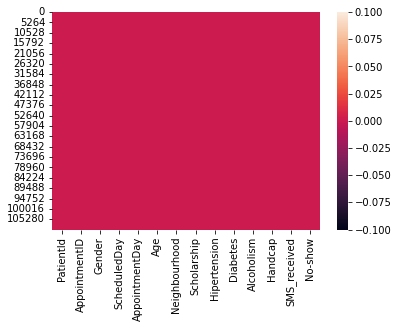

In [20]:
# Visualisation des différentes variables manquantes avec heatmap
sns.heatmap(df.isna())

#### Interprétation
Cette représentation, nous montre que notre ensemble de données contient aucune valeur manquante. Ce qui est très important pour la suite de notre analyse

In [21]:
# Recherche des doublons dans le dataset
df.duplicated().sum()

0

In [22]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Analyse de la forme

1. L'ensemble des données concernant les rendez-vous medicaux compte au total 110527 lignes soit 110527 patients et 14 variables.
2. Les variables (caractéristiques)
Comme dit précedemment, l'ensemble de données comporte 14 variables dont 13 variables explicatives et 1  variable à expliquer. La variable à expliquer est une variable bimodale. La majorité des variables explicatives comme la variable à expliquer sont bimodales c'est à l'image de 'Gender', 'Scholarshipr	'Hipertensionr, 'Diabetes',	'Alcoholism', Handcap'	'SMS_received'. Cependant, d'autre ne le sont pas.  
3. Variables Manquantes et doublons  
En effet, l'ensemble de données ne contient ni de variable manquante ni de variables doublons.
4. Préparation des données  
    - suppression du patients ayant leur age inférieur à 0.
    - Suppression de deux colonne inutile dans le cadre de notre analyse notamment 'PatientId', et 'ApointmentID'.


### Préparation des données
1. Dans cette partie, il est question de supprimer les deux variables PatientID et ApointmentID qui ont peut de valeur dans notre analyse.
2. Etant données la colonne 'No-show' qui contient un caractère qui nous complique l'analyse, il serait alors nécessaire de la rénomé en No_show.
3. Enfait, notre dataset contient un patient qui à un âge inférieur à 0. Ce qui est surement dû à une mauvaise saisie. Donc il est necessaire de la supprimée.

In [23]:
# Renomée la colonne No-show en No_show
df.rename(columns={"No-show":"No_show"}, inplace = True)

In [24]:
# Suppression des colonnes non necessaire dans notre analyse
df.drop(["PatientId", "AppointmentID"], axis = 1, inplace = True)

In [25]:
# Nouvelle dimension de notre dataset
df.shape

(110527, 12)

In [26]:
# Ici, nous utilisons la fonction where de numpy pour selection unique
# les patients dont leurs âges est négative
age_extreme, = np.where(df.Age<0)

# Ensuite, c'est la suppression
df.drop(index=age_extreme, axis=0, inplace = True)

### Analyse Exploratoire de données
1. **Analyse Univarié et Bivarié**  
Dans cette partie, il s'agira d'analysé d'une part chaque variable pour enrichir nos recherches.  
D'autre part nous allons faire une analyse comparatif entre les variables explicatives et la variable à expliquer. Cette analyse se fera deux à deux, c'est-à-dire une variable explicative et la variable à expliquer à la fois.
2. **Visualisation**   
En effet, l'analyse sera accompagner de graphique permettant d'avoir une forme visuelle de notre travail.  
Pour la visualisation, nous utilisons les pie charts pour visualer uniquement les variables bimodale ou trimodale. Nous utilisons également les diagrammes en barres pour répresenter certains variables bimodales mais également les résultats des croisement entre chaque variable explicatives et la variable à expliquer.
Par ailleurs, nous utilisons le heatmap pour répresenter les variables manquantes de notre dataset.
3. **Conclusion**  
Chaque Analyse sera sanctionné par une conclusion pour permettre une meuilleur comprenhension de notre demarche dans la résolution des différentes questions posées.

Visualisation des effectifs des hommes et des femmes

F    71839
M    38687
Name: Gender, dtype: int64

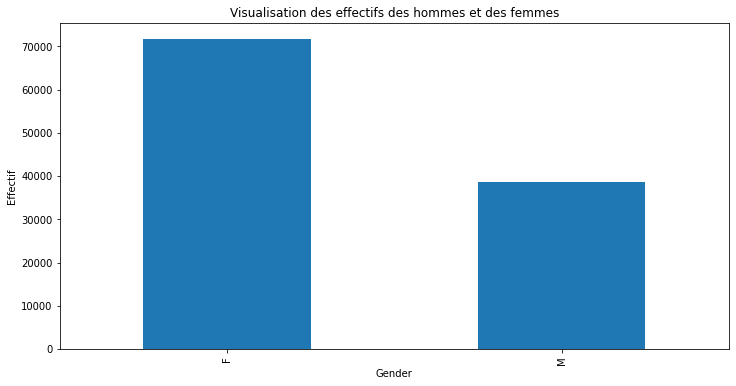

In [27]:
title = "Visualisation des effectifs des hommes et des femmes"
label = {"x":"Gender","y":"Effectif"}
barplot(df.Gender, label, title)
df.Gender.value_counts()

#### Interprétation
La variable 'Gender' présente un effectif élevée de Femme(F) par rapport aux hommes(M).  
Nous avons en effet 71839 Feminin et 38687 Masculin.

In [28]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Visualisation de la variable scholarship

0    99665
1    10861
Name: Scholarship, dtype: int64

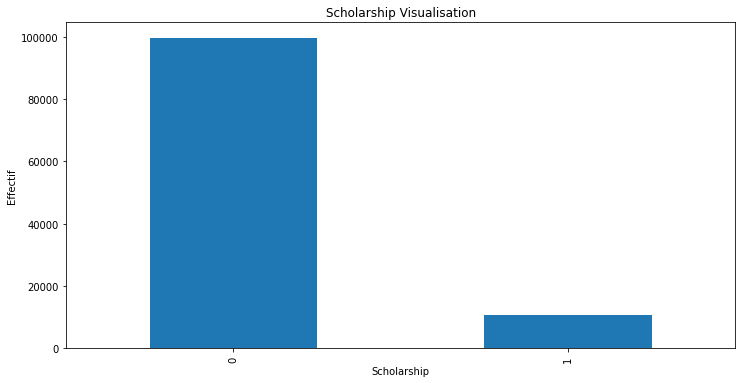

In [69]:
# Visualisation de la variable scholarship
title = "Scholarship Visualisation"
label = {"x":"Scholarship","y":"Effectif"}
barplot(df.Scholarship, label, title)
df.Scholarship.value_counts()

#### Interprétation
La variable Scholarship nous présente une assez grande majorité de patients qui ne bénéficie pas de l’aide financière octroyée aux ménages moins riches. Par contre les patients bénéficiant de cette aide sont très minoritaires soit un effectif de 10861 qui ont l’aide contre 99665 qui n’ont pas l’aide.

Visualisation de la variable Hipertension

0    88725
1    21801
Name: Hipertension, dtype: int64

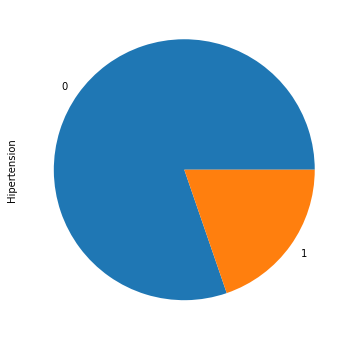

In [73]:
# Visualisation de la variable Hipertension
pieplot(df.Hipertension)
df.Hipertension.value_counts()

#### Interprétation

Le diagramme de barre ci-dessus nous présente la proportion des patients souffrant de l’hypertension. On remarque que moins de patients souffre de l’hypertension soit un effectif de 21801. Cet effectif est très faible par rapport aux patients qui ne souffre pas l’hypertension soit un effectif de 88725.


Visualisation de la variable Diabetes

0    102583
1      7943
Name: Diabetes, dtype: int64

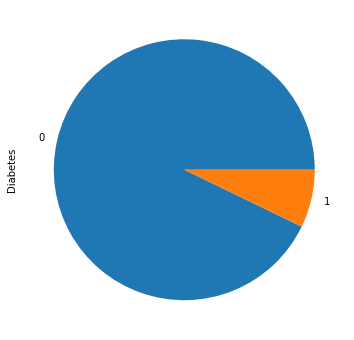

In [71]:
pieplot(df.Diabetes)
df.Diabetes.value_counts()

#### Interprétation

Le pie chart ci-dessus, nous montre que notre dataset est constitué contient moins de malade de Diabètes. Le nombre de patients qui souffrent de la diabète est 7943. 

Visualisation de la variable Alcoholism

0    107166
1      3360
Name: Alcoholism, dtype: int64

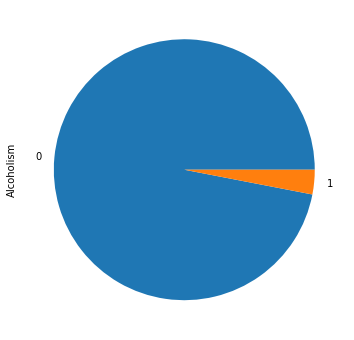

In [72]:
pieplot(df.Alcoholism)
df.Alcoholism.value_counts()

#### Interprétation

Les patients alcoholique sont aux nombres de 3360. Ce qui est trés faible comparativement aux nombre de patients que contient notre dataset.

### Interprétation Spéciale
L'analyse des variables Hipertention, alcoholism et Diabetes nous montre qu'il y'a plus de malade d'hypertension que diabétique et plus de diabétique qu’alcoolique. Cependant, il faut noter que nous avons certains patients qui souffre à la fois de deux maladies. Autrement, nous pouvons trouver un patient qui souffre à la fois de l'Hypertension et du diabète, c'est à l'image du patient à la ligne 4 de notre dataset. Nous avons des patients qui souffrent du diabète et de l'alcoolisme comme le patient à la ligne 46 de notre dataset.

Visualisation de la variable Handcap

5

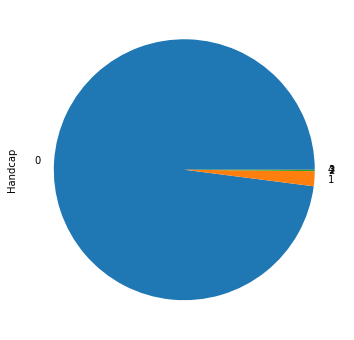

In [90]:
pieplot(df.Handcap)
df.Handcap.nunique()


#### Interprétation

La variable Handcap contient 5 valeurs differentes.  
Ce qui n'est pas normale car celon, la documentation la variable ne doit contenir que deux valeurs : Vrai ou faux.   
La variable est en majorité constitué de 0 et 1, les valeurs (3, 4, 5) sont présent mais en plus petite quantité. 

SMS_received

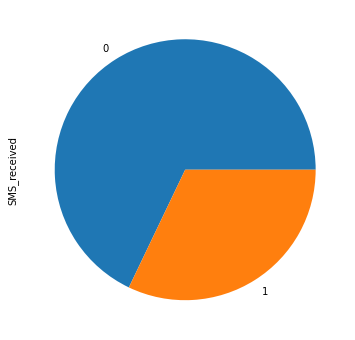

In [34]:
pieplot(df.SMS_received)

### Interprétation
Le nombre de patients ayant reçuent les SMS sont minoritaire par rapport à ceux ne l'ayant pas reçu.  
Ce graphique ci-dessus, nous donne une idée sur la proportion.  

Visualisation de la variable No_show

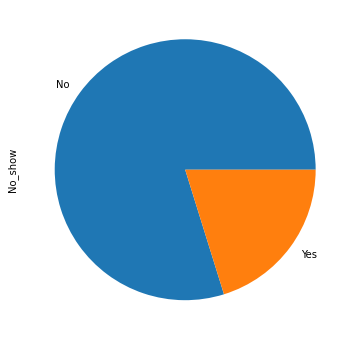

In [35]:
pieplot(df.No_show)

### Interprétation

Notre graphique nous montre, une proportion importante de patient ayant honoré leur rendez-vous. Néanmoins, le nombre de patient qui ont manqué à leur rendez-vous ne pas pour autant négligeable. C'est ce qui suscite l'interrogation à savoir les facteurs permettant de savoir si le patient pourra honorer son rendez-vous.

# Analyse Bivariee

Affichage des Cinq Prémière colonne de notre dataset

In [36]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

### Croisement entre 'Scholarship' et 'No_show'

#### Interprétation
À l'issue du croisement entre ces deux variables, sur une population de 110526 seulement 10% bénéficie de l’aide financière. Et sur cette proportion de 10%, 74.94% respecte au mieux leur rendez-vous contre 25.06%. Ce qui nous permet de dire que l’aide financière participe beaucoup au respect des jours du rendez-vous. Par-dessus tout sur une proportion de 90% des patients 80% respecte leur rendez-vous avec le médecin contre 20%. Ce qui sous-entend que nous avons à faire à une population plus ou moins riche. Donc en conclusion, dans une population en majorité riche, l’aide financière ne permet pas de prédire la présence du patient au rendez-vous. Par contre si la population est à majorité n’est pas assez riche alors, l’aide est d’une importance capitale.

In [38]:
print(df.shape[0])
print(np.round(100*df.Scholarship.value_counts()/df.shape[0]))
100*df[["Scholarship", "No_show"]].value_counts()/df.shape[0]

110526
0    90.0
1    10.0
Name: Scholarship, dtype: float64


Scholarship  No_show
0            No         72.312397
             Yes        17.860956
1            No          7.494164
             Yes         2.332483
dtype: float64

Visualisation de Scholarship en fonction de No_show

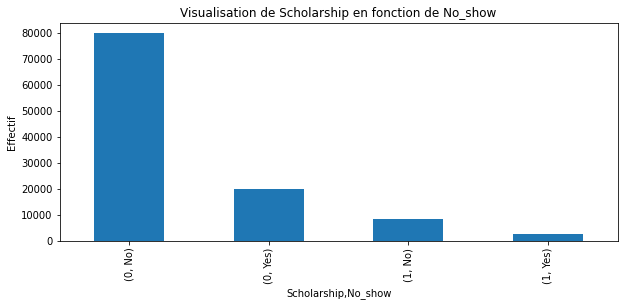

In [39]:
title = "Visualisation de Scholarship en fonction de No_show"
barhplot(df[["Scholarship", "No_show"]], title)

### Croisement entre la variable Gender et No_show

#### Interprétation
Notre dataset comporte 65% de Femme contre 35% d’Homme. Ce qui montre que les femmes prennent plus de rendez-vous que les hommes. En outre sur cette proportion de Femme nous avons 80% d’entre elle qui honore les rendez-vous contre 20%. De là viens la conclusion que le genre du patient nous permet de prédire sa présence au rendez-vous avec le médecin.

In [40]:
print(100*df[["Gender"]].value_counts()/df.Gender.shape[0])
100*df[["Gender", "No_show"]].value_counts()/df.shape[0]

Gender
F         64.997376
M         35.002624
dtype: float64


Gender  No_show
F       No         51.793243
M       No         28.013318
F       Yes        13.204133
M       Yes         6.989306
dtype: float64

Visualisation de Gender en fonction de No_show

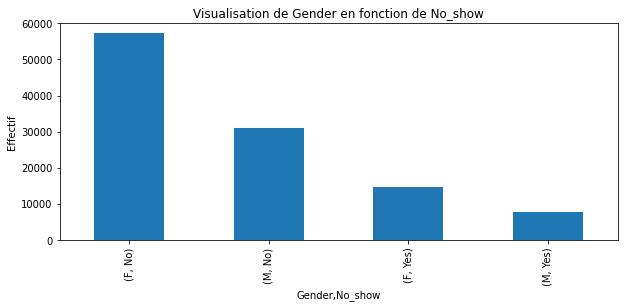

In [41]:
title = "Visualisation de Gender en fonction de No_show"
barhplot(df[["Gender", "No_show"]], title)

### Croisement entre la variable 'Age' et 'No_show'

#### Interprétation
Pour mieux analyser la variable Age, il était nécessaire de le catégoriser en trois groupes principaux.
Ainsi, est considéré jeune, les patients de moins de 24 ans, Adulte, ceux dont l’âge est compris entre 25 et 64ans. Et les vieux sont ceux dont leur âge est supérieur à 64 ans. Nôtre ensemble de données est à majorité Adulte soit 55.01% et respectivement 31.52% et 13.46% pour les patients respectivement Jeune et vieux. L’analyse entre les deux caractéristiques nous laisse voir que les adultes respectent plus les rendez-vous que les jeunes eux même qui respecte mieux que les vieux. Cela était prévisible si on se base sur la proportion des patients. Nous pouvons dés lors signifier que l’âge est un bon indicateur de la présence du patient au rendez-vous.


In [42]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [43]:
# Catégorisation de la variable Age en Jeune, Adulte et Vieux
bins_values = np.array([0,24, 64,115] )
bins_label = ["Jeune", "Adulte", "Vieux"]
df["Age"] = pd.cut(df.Age, bins=bins_values, labels=bins_label)

In [44]:
df.Age.describe()

count     106987
unique         3
top       Adulte
freq       58857
Name: Age, dtype: object

In [45]:
df[["Age", "No_show"]].value_counts()

Age     No_show
Adulte  No         47237
Jeune   No         25901
Vieux   No         12169
Adulte  Yes        11620
Jeune   Yes         7827
Vieux   Yes         2233
dtype: int64

Visualisation de la nouvelle variable Age

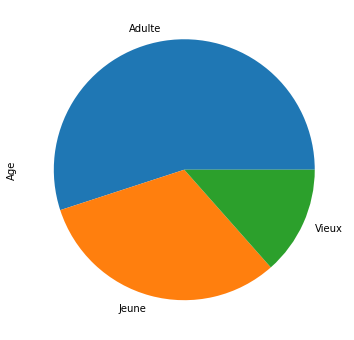

In [46]:
# Visualisation de la nouvelle variable Age
pieplot(df.Age)

### Interprétation
Le graphique ci-dessus nous présente la variable âge que nous avons catégorisé.   
Le graphique nous présente une proportion élevée d’Adulte par rapport aux jeunes et vieux. Le diagramme pie chart nous donne une bonne visualisation des différentes catégories des âges.

visualisation de l'Age et no_show

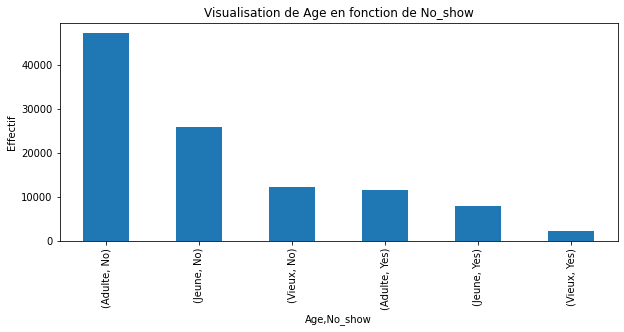

In [47]:
# visualisation de l'Age et no_show
title = "Visualisation de Age en fonction de No_show"
barhplot(df[["Age", "No_show"]], title)

### Croisement entre la variable 'SMS_received' et 'No_show'

#### Interprétation
67.9% de patients n'ont pas reçu contre 32.1% qui ont reçu le message. Le croisement entre la variable 'SMS_received' et 'No_show' nous indique que l'effectif des patients n'ayant pas reçu le message mais qui ont honoré leur rendez-vous est supérieur à ceux ayant reçu le message. Cela nous permet de dire que la réception du message n'a pas d'effet sur la présence ou l'absence d'un patient dans un rendez-vous avec le médecin.

In [48]:
np.round(100*df.SMS_received.value_counts()/df.SMS_received.count(), 2)

0    67.9
1    32.1
Name: SMS_received, dtype: float64

Visualisation de la variable SMS_received

In [50]:
df[["SMS_received", "No_show"]].value_counts()

SMS_received  No_show
0             No         62509
1             No         25698
0             Yes        12535
1             Yes         9784
dtype: int64

SMS_received  No_show
0             No         56.555923
1             No         23.250638
0             Yes        11.341223
1             Yes         8.852216
dtype: float64


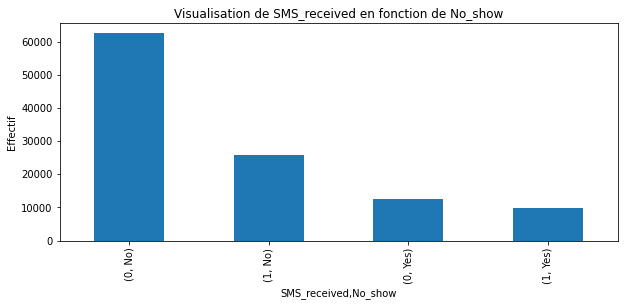

In [51]:
print(100*df[["SMS_received", "No_show"]].value_counts()/df.No_show.shape[0])
title = "Visualisation de SMS_received en fonction de No_show"
barhplot(df[["SMS_received", "No_show"]], title)

### Croisement entre AppointmentDay et No_show

#### Interprétation
Pour mieux réussir ce croisement, il a fallu deux colonnes supplémentaires comportant des informations sur le mois (Avril, Mai, Juin) et le jour (Lundi, Mardi, Mercredi, Jeudi, Vendredi, Samedi) du rendez-vous. En effet, sur 110526, nous avons 73.14% de rendez-vous en Mai, 23.93% en Juin et 2.92% en Avril. L’analyse sur les mois du rendez-vous, nous montre qu’il y’a bien plus de rendez-vous respecter le moi de Mai que d’avril et Juin d’autant plus que c’est le mois où il y’a eu beaucoup plus de rendez-vous. L’analyse des jours du rendez-vous nous révélé qu’il n’Ya pratiquement pas de rendez-vous les Samedi comparé aux autres jours de la semaine. Ce qui explique le nombre élevé de rendez-vous durant ces jours. Nous pouvons déduire que le mois et le jour du rendez-vous ne justifie pas la présence d’un patient au rendez-vous.

In [52]:
# Conversion de la variable Appointment de object en datetime.
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [53]:
# Extraction du mois et du jour appartir de la variable AppointmentDay
df["AppointmentDay_month"] = df.AppointmentDay.dt.month_name() # Mois
df["AppointmentDay_day"] = df.AppointmentDay.dt.day_name() # Jours

Visualisation de AppointmentDay_month

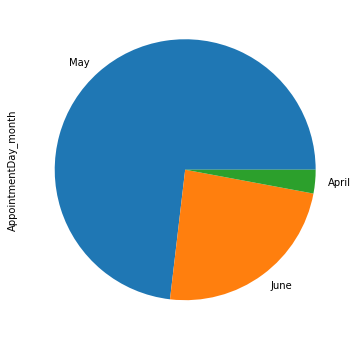

In [54]:
# Visualisation de AppointmentDay_month
pieplot(df["AppointmentDay_month"])

### Interprétation

L'extraction des mois de la variable AppointmentDay nous donne une idée sur les mois de l'année 2016 concerné par notre analyse.  
Nous avons en effet, le mois d'Avril, de Mai et de Juin.  
Il y'a eu plus de rendez-vous dans le mois de Mai que les deux autres mois (Avril et Juin).

Visualisation du croisement de la variable AppointmentDay_month en fonction de No_show

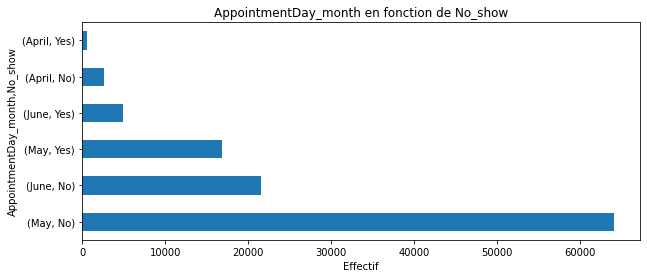

In [55]:
title = "AppointmentDay_month en fonction de No_show"
barhplot(df[["AppointmentDay_month", "No_show"]], title, True)

Visualisation des jours de rendez-vous

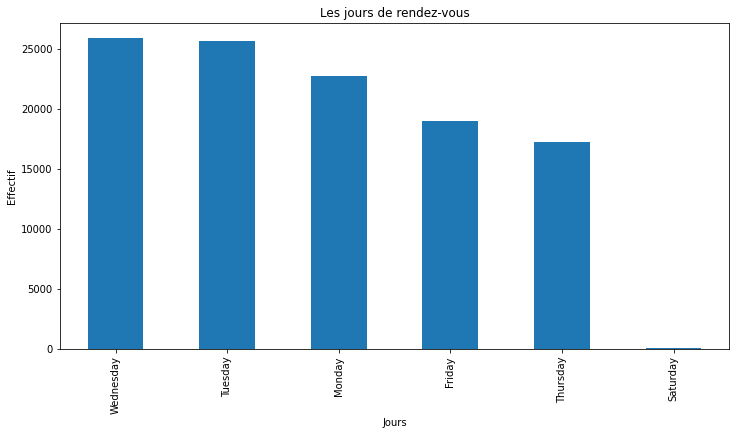

In [56]:
label = {"x":"Jours", "y":"Effectif"}
title = "Les jours de rendez-vous"
barplot(df["AppointmentDay_day"], label, title)

### Interprétation

Le diagramme en bar nous présente les différents jours du rendez-vous effectuer par semaine.   
Le graphique nous montre qu'il y'a plus de rendez-vous le Mardi et le Mercredi.   
Nous avons moins de rendez-vous le Lundi, Jeudi et Vendredi.   
Par contre le Samedi, il y'a très peu de rendez-vous, voire quasiment même pas de rendez-vous. 

In [57]:
100*df[["AppointmentDay_day", "No_show"]].value_counts()/df.shape[0]

AppointmentDay_day  No_show
Wednesday           No         18.795578
Tuesday             No         18.536815
Monday              No         16.307475
Friday              No         13.555182
Thursday            No         12.584369
Tuesday             Yes         4.661347
Wednesday           Yes         4.607966
Monday              Yes         4.243345
Friday              Yes         3.652534
Thursday            Yes         3.020104
Saturday            No          0.027143
                    Yes         0.008143
dtype: float64

Visualisation du crosement de la variable AppointmentDay_day en fonction de No_show

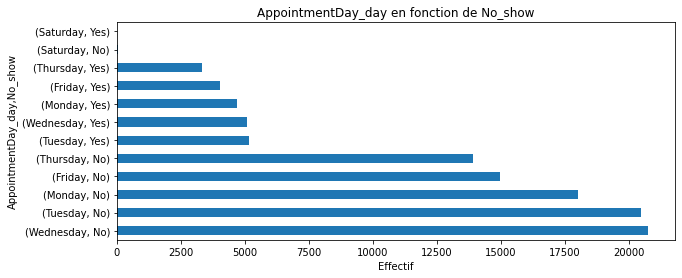

In [58]:
title = "AppointmentDay_day en fonction de No_show"
barhplot(df[["AppointmentDay_day", "No_show"]], title, True)

### Croisement entre Malade et 'No_show'
#### Interprétation
Dans cette partie, nous avons jugé nécessaire d’ajouter une colonne pour spécifier les malades c’est-à-dire un patient atteint d’une de ces maladie Hipertension, le Diabetes et l'Alcoholism et les non malades. Étant donnée un ensemble de 110526 patients, nous avons 77.19% qui ne sont pas malade et 22.81% qui sont malade. Ainsi la proportion des non malade étant assez élevé nous montre bien qu’ils respectent aux mieux leur rendez-vous comparé à ce malade. Cependant, une étude bien détaillée sur les patients Hypertendus et/ou Diabétiques révèle que ces derniers respectent bien plus les rendez-vous étant donnée leur état de santé. Par conséquent, nous pouvons conclure en disant que la caractéristique Hipertension et Diabetes peuvent nous permettre de prédire si le patient viendra au rendez-vous. En outre la variable Alcoholism n’est pas d’une grande importance dans la prédiction.

In [59]:
# On selection tout les patients qui souffre au moins de l'hipertension, du Diabetes
# et de l'alcoholism
df1 = df.query("(Hipertension==1)""or (Diabetes==1)""or (Alcoholism==1)")

In [60]:
# Ajout d'une nouvelle colonne 'malade = 1' pour les patients malade
# La fonction repeat de numpy est necessaire.
df1.loc[:, "Malade"] = np.repeat(1,len(df1))

C:\Users\user\AppData\Local\Temp\ipykernel_6632\3440448397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, "Malade"] = np.repeat(1,len(df1))


In [61]:
# On selection les patients qui ne souffre d'aucune de ces maladies
df2 = df.query("(Hipertension==0)""and (Diabetes==0)""and (Alcoholism==0)")
# initialisation de la nouvelle variable à 0.
df2.loc[:, "Malade"] = np.repeat(0,len(df2))

C:\Users\user\AppData\Local\Temp\ipykernel_6632\3502309714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "Malade"] = np.repeat(0,len(df2))


In [62]:
# Fusion des deux dataframe pour consituer un seule.
df_new = pd.concat([df1, df2], axis=0, ignore_index=True)

In [63]:
# Sauvegarde de la nouvelle dataset sour le non de appointments.csv
df_new.to_csv("appointments.csv", index=False)

0    0.771864
1    0.228136
Name: Malade, dtype: float64

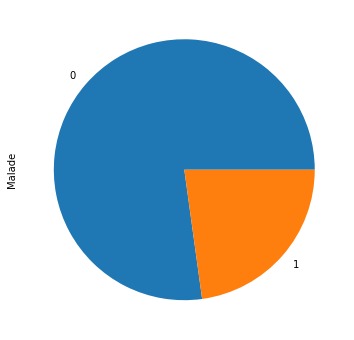

In [64]:
pieplot(df_new.Malade)
df_new.Malade.value_counts()/df_new.Malade.count()

Visualisation des Malades respectant les rendez-vous

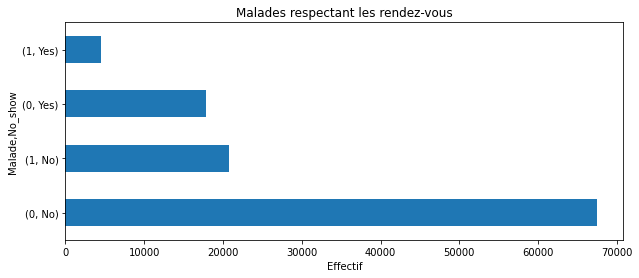

In [65]:
title = "Malades respectant les rendez-vous"
barhplot(df_new[["Malade","No_show"]], title, True)

Visualisation de la variable Hippertation et No_show

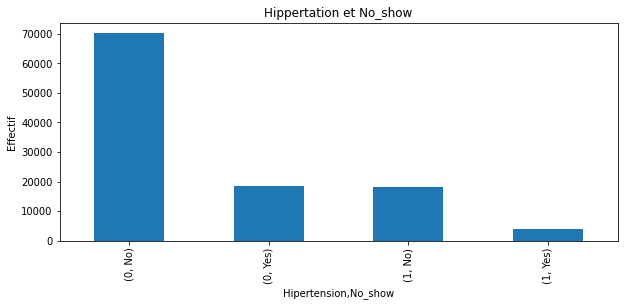

In [66]:
title = "Hippertation et No_show"
barhplot(df[["Hipertension","No_show"]], title)

Visualisation de la variable Diabetes et No_show

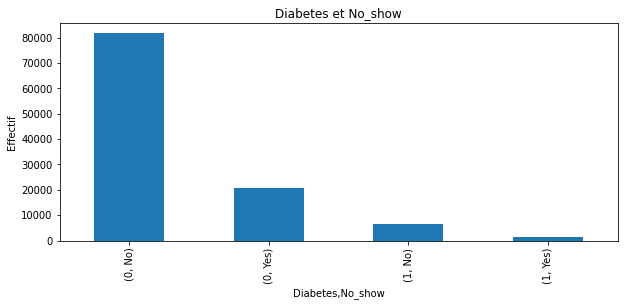

In [67]:
title = "Diabetes et No_show"
barhplot(df[["Diabetes","No_show"]], title)

Visualisation de la variable Alcoholism et No_show

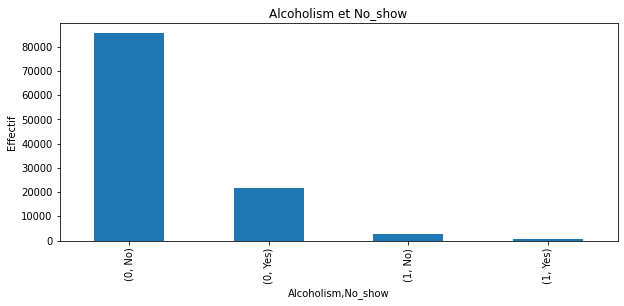

In [68]:
title = "Alcoholism et No_show"
barhplot(df[["Alcoholism","No_show"]], title)

# Conclusion Générale

Notre analyse porte sur l’ensemble de données No-Show appointments disponible sur kaggle. Tout au long de notre analyse nous avons utilisé python comme langage de programmation. En effet python nous offre des modules bien adapter pour l’analyse des données. Les modules utilisés à cet effet sont nécessairement :
Pandas : utilisé pour le chargement et la manipulation des données ;
Numpy : utilisé pour effectuer des opérations mathématiques.
Matplotlib et Seaborn : sont utilisé pour la visualisation. 
En plus de ces outils, nous avons eu recours à Jupyter Notebooks comme environnement de travail.  
À l’issue de l’analyse nous somme en mesure de répondre aux différentes questions que nous nous étions posés au tout début de notre analyse.  

1)	En effet, notre analyse nous révèle bien que les adultes c’est-à-dire les patients ayant un âge compris entre 25 et 64 ans sont beaucoup plus favorables au rendez-vous. Cela s’explique à travers l’effectif du nombre de patients qui ont respecté les rendez-vous.   

2)	En outre, l’envoie de message de rappelle à peut de valeur sur le respect des rendez-vous d’autant plus que le nombre de patients ayant reçu les messages et ayant respecté le rendez-vous est minoritaire devant ceux n’ayant même pas reçu le message et qui ont honoré leur rendez-vous.  

3)	Par ailleurs, dans une population bien plus riche, l’aide financière n’impacte pas le rendez-vous. Par contre dans une population à majorité moins riche, l’aide financière est très important pour le respect des rendez-vous car la proportion des patients ayant reçu l’aide financière et qui ont respecté leur rendez-vous n’étais pas négligeable.  

4)	Également, dans notre dataset, les mois et jours du rendez-vous ont peut d’influence sur le respect du jour du rendez-vous. Cela sans doute parce que soit la majorité des patients sont des femmes car les mieux représenté ou parce la majorité n’ont pas de d’occupation particulière le jour de leur rendez-vous.

5) Les patients Hypertendu ou Diabétiques en raison de leur état de santé sont enclins à bien plus respecter leur rendez-vous vis-à-vis de leur état de santé. 

6)  Dans notre analyse, nous avons trouvé que les patients sont en majorité des femmes. Ce qui est en adéquation avec les dits de la documentation. Cette proportion élevée des femmes explique le fait que les taux de femmes respectant les rendez-vous soient plus élevé que celui des hommes qui sont minauritaire.On s'en tient alors à cette conclusion: les femmes sont beaucoup plus préoccupées par leurs états de santé comparativement aux hommes. Les femmes respectent plus les rendez-vous que les hommes.

Donc retenons que pour effectuer un modèle de prédictions les caractéristiques :   'Gender,Hipertension, Diabetes, Age, Scholarship, peuvent s’avérer nécessaire.   




### Limit
L'analyse de l'ensemble de données "appointments_data.csv" nous apprend beaucoup de chose. Cependant certains limites se font resentir.  
En effet, celon la documentation [noshowappointments] (https://www.kaggle.com/datasets/joniarroba/noshowappointments), la variable Handcap devais être une variable bimodale afficher vrai ou faux. Cependant, dans nos analyse, nous marquons qu'elle posséde 4 valeur numériques. Ce qui rend compliqué nos analyse car n'ayant aucune documentation complète sur cette variable.   
En outre les données analysés concerne uniquement trois mois sur les douze notamment le moi d'Avril, de Mai et de Juin. Ce qui nous permet pas de tirer des conclusions concernant l'année 2016 entièrement.

### Documentations :
1. https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
2. https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
3. https://www.kaggle.com/datasets/joniarroba/noshowappointments